<a href="https://colab.research.google.com/github/georgesnape01/SW/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Success: Machine Learning Models for CBT Therapy Outcomes

# 1. Introduction

This study aims to utilise machine learning techniques to predict the likelihood of success in Cognitive Behavioral Therapy (CBT) using data. The dataset encompasses various demographic, treatment-related, and psychological assessment variables, offering insights into patient profiles and treatment outcomes.  By leveraging various analytical skills, predictive models will aid in revealing the success probability for CBT in individual patients.

# 2. Preprocessing

## Functions

2.2 Non-Questionnaire Data Preprocessing

In [ ]:
def rename_cols(df):
    df.rename(columns = {
        'Unnamed: 0': 'CaseID',
        'IAPTus_Num': 'ClientID',
        'Referral Date': 'ReferralDate',
        'Age_ReferralRequest_ReceivedDate': 'AgeAtReferralRequest',
        'EthnicDescGroupCode': 'EthnicCode',
        'EthnicCategoryGroupShortCode': 'EthnicCodeShort',
        'GenderIdentity': 'Gender',
        'SexualOrientationDesc': 'SexualOrientation',
        'EndDescGroupShort': 'Treated',
        'AllocatedCareProfNameCode': 'TherapistID',
        'JobTitleCode': 'ExperienceLevel',
        'Days to first assessment': 'DaystoAssessment',
        'Days to first treatment': 'DaystoTreatment',
        'CountOfAttendedCareContacts': 'CareContacts',
        'RecoveryDesc': 'Recovery',
        'ReliableRecoveryDesc': 'ReliableRecovery',
        'Date': 'DateOfQuestionnaire'},
        inplace = True)
    return df

## 2.1 Overview

First load in the appropriate packages for EDA. Access the google drive folder, save the data in the folder ready to access. Load in the data.

In [164]:
# EDA packages
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# access google drive folder
drive.mount("/content/drive")

# load data
raw_df = pd.read_csv("/content/drive/MyDrive/Data/Dissertation_Data/mental_health.csv", delimiter = ",") # csv
df = raw_df

# set seed
#np.random.seed(2001)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now data is loaded in, check its contents and structure.

In [165]:
# data sample
raw_df.head(3)

,Unnamed: 0,IAPTus_Num,Referral Date,Age_ReferralRequest_ReceivedDate,EthnicDescGroupCode,EthnicCategoryGroupShortCode,GenderIdentity,SexualOrientationDesc,EndDesc,EndDescGroupShort,...,Item216,Item217,Item218,Item219,Item220,Item221,Item222,Item223,Item224,Item225
0,1,24475,08/09/2018,5.099020,1.0,1.0,2,NaN,Mutually agreed completion of treatment,Seen and treated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,24476_1,10/04/2019,4.358899,1.0,1.0,2,NaN,Mutually agreed completion of treatment,Seen and treated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24476_2,28/03/2021,4.582576,1.0,1.0,2,NaN,Termition of treatment earlier than Care Profe...,Seen and treated,...,0,0,1,1,1,0,0,0,0,0


In [166]:
# data information
print('Data information:\n')
print('Number of rows:', raw_df.shape[0])
print('Number of columns:', raw_df.shape[1])
print('Type:', type(raw_df))

Data information:

Number of rows: 728
Number of columns: 279
Type: <class 'pandas.core.frame.DataFrame'>


**Data Content**
- Range of data types, numerical, categorical, nominal, ...
- Possibily Standardised variables (age)
- Some variables are very sparse, check this
- Check for standard things, e.g outliers, ...

**Data Structure**
- Not many entries, only 728
- A lot of variables, 279
- Perform feature selection, reduce number of variables

## 2.2 Non-Questionnaire Data Preprocessing



First, making changes to the variable names.

In [167]:
# rename columns
df.rename(columns = {
    'Unnamed: 0': 'CaseID',
    'IAPTus_Num': 'ClientID',
    'Referral Date': 'ReferralDate',
    'Age_ReferralRequest_ReceivedDate': 'AgeAtReferralRequest',
    'EthnicDescGroupCode': 'EthnicCode',
    'EthnicCategoryGroupShortCode': 'EthnicCodeShort',
    'GenderIdentity': 'Gender',
    'SexualOrientationDesc': 'SexualOrientation',
    'EndDescGroupShort': 'Treated',
    'AllocatedCareProfNameCode': 'TherapistID',
    'JobTitleCode': 'ExperienceLevel',
    'Days to first assessment': 'DaystoAssessment',
    'Days to first treatment': 'DaystoTreatment',
    'CountOfAttendedCareContacts': 'CareContacts',
    'RecoveryDesc': 'Recovery',
    'ReliableRecoveryDesc': 'ReliableRecovery',
    'Date': 'DateOfQuestionnaire'},
    inplace = True)

The few continuous variables need to be of float64 format, the categorical need to be int64s. Looking at the output, some need to be altered slightly.

In [168]:
# variable names and types
print('Column names and types:')
df.iloc[:, 0:20].dtypes

Column names and types:


CaseID                    int64
ClientID                 object
ReferralDate             object
AgeAtReferralRequest    float64
EthnicCode              float64
EthnicCodeShort         float64
Gender                   object
SexualOrientation       float64
EndDesc                  object
Treated                  object
TherapistID             float64
ExperienceLevel         float64
DaystoAssessment        float64
DaystoTreatment         float64
CareContacts            float64
ReliableChangeDesc       object
Recovery                 object
ReliableRecovery         object
EndDescShort             object
DateOfQuestionnaire      object
dtype: object

Before looking at the object data, make the relevant changes to the numerical data. This includes variables that contain almost all unique values (like ClientID), so that the unique values are easy to view later.

In [169]:
# create ReferralCount
def count_referrals(col):
    if '_1' in col:
        return 1
    elif '_2' in col:
        return 2
    elif '_3' in col:
        return 3
    else:
        return 1
df.insert(2, "ReferralCount", df['ClientID'].apply(count_referrals)) # introduce next to ClientID

# adjust ClientID
for text in ['_1', '_2', '_3', '_4']:
    df['ClientID'] = df['ClientID'].str.replace(text, '') # remove ending
df['ClientID'] = pd.to_numeric(df['ClientID'])

# convert to datetime
df['ReferralDate'] = pd.to_datetime(df['ReferralDate'], format = '%d/%m/%Y')
df['DateOfQuestionnaire'] = pd.to_datetime(df['DateOfQuestionnaire'], format = '%d/%m/%Y')

# convert float to integers
df['EthnicCode'] = df['EthnicCode'].astype('Int64') # Int deals with NaNs, int does not
df['EthnicCodeShort'] = df['EthnicCodeShort'].astype('Int64')
df['TherapistID'] = df['TherapistID'].astype('Int64')
df['ExperienceLevel'] = df['ExperienceLevel'].astype('Int64')

Changes:
- Create a new column called ReferralCount counting the referrals (from clientID)
- Converted ClientID from object to numeric
- Converted date variables to datetime types
- Converted relevant types from floats to integers

Viewing the object type data and the values they contain.

In [170]:
# select object data
object_vars = df.iloc[:, 0:20].select_dtypes(include = ['object'])

# unique values in categorical data
for var in object_vars:
    unique_vals = df[var].unique()
    print(var)
    print(unique_vals)
    print()

Gender
['2' '1' 'CHANGE ME' 'X' nan]

EndDesc
['Mutually agreed completion of treatment'
 'Termition of treatment earlier than Care Professiol planned'
 'Not suitable for IAPT service - no action taken or directed back to referrer'
 nan 'Referred to another therapy service by mutual agreement']

Treated
['Seen and treated' 'Seen but not treated' nan]

ReliableChangeDesc
['Reliable improvement' 'No reliable change' 'Not applicable'
 'Reliable deterioration' nan]

Recovery
['At recovery' 'Not at recovery' 'Not applicable' nan]

ReliableRecovery
['Reliable recovery' 'No reliable recovery' 'Not applicable' nan]

EndDescShort
['Completed' 'Ended before care professiol planned' 'Not suitable' nan
 'Referred elsewhere']



Creating appropriate maps to convert from object data to numerical whilst also one hot encoding too.

In [171]:
# GenderIdentity
Gender_map = {
    'CHANGE ME': np.nan,
    'X': np.nan}
df['Gender'] = df['Gender'].replace(Gender_map).astype('Int64')

# Treated
Treated_map = {
    'Seen and treated': 1,
    'Seen but not treated': 0}
df['Treated'] = df['Treated'].replace(Treated_map).astype('Int64')

# ReliableChangeDesc (-1, 0, 1)
ReliableChangeDesc_map = {
    'Reliable improvement': 2,
    'No reliable change': 1,
    'Reliable deterioration': 0,
    'Not applicable': np.nan}
df['ReliableChangeDesc'] = df['ReliableChangeDesc'].replace(ReliableChangeDesc_map).astype('Int64')

# Recovery
Recovery_map = {
    'At recovery': 1,
    'Not at recovery': 0,
    'Not applicable': np.nan}
df['Recovery'] = df['Recovery'].replace(Recovery_map).astype('Int64')

# ReliableRecovery
ReliableRecovery_map = {
    'Reliable recovery': 1,
    'No reliable recovery': 0,
    'Not applicable': np.nan}
df['ReliableRecovery'] = df['ReliableRecovery'].replace(ReliableRecovery_map).astype('Int64')

# EndDesc (onehotencode)
EndDesc_cols = pd.get_dummies(df['EndDesc'], prefix = 'EndDesc')
EndDesc_index = df.columns.get_loc('EndDesc')
df = pd.concat([df.iloc[:, :EndDesc_index + 1], EndDesc_cols, df.iloc[:, EndDesc_index + 1:]], axis = 1)
df = df.drop(columns = ['EndDesc'])

# EndDescShort (onehotencode)
EndDescShort_cols = pd.get_dummies(df['EndDescShort'], prefix = 'EndDescShort')
EndDescShort_index = df.columns.get_loc('EndDescShort')
df = pd.concat([df.iloc[:, :EndDescShort_index + 1], EndDescShort_cols, df.iloc[:, EndDescShort_index + 1:]], axis = 1)
df = df.drop(columns = ['EndDescShort'])

# convert to integer columns
int_cols = ['SexualOrientation', 'DaystoAssessment', 'DaystoTreatment', 'CareContacts']
for col in int_cols:
    df[col] = df[col].astype('Int64')

A quick look at the new data types, along with a before and after sample of the data.

In [172]:
# variable names and types
print('Column names and types:')
df.iloc[:, 0:26].dtypes

Column names and types:


CaseID                                                                                           int64
ClientID                                                                                         int64
ReferralCount                                                                                    int64
ReferralDate                                                                            datetime64[ns]
AgeAtReferralRequest                                                                           float64
EthnicCode                                                                                       Int64
EthnicCodeShort                                                                                  Int64
Gender                                                                                           Int64
SexualOrientation                                                                                Int64
EndDesc_Mutually agreed completion of treatment                          

In [173]:
# data sample
raw_df.iloc[:, 0:21].head(3)

,CaseID,ClientID,ReferralCount,ReferralDate,AgeAtReferralRequest,EthnicCode,EthnicCodeShort,Gender,SexualOrientation,EndDesc,...,TherapistID,ExperienceLevel,DaystoAssessment,DaystoTreatment,CareContacts,ReliableChangeDesc,Recovery,ReliableRecovery,EndDescShort,DateOfQuestionnaire
0,1,24475,1,2018-09-08,5.099020,1,1,2,NaN,Mutually agreed completion of treatment,...,1,1,NaN,131.0,53.0,2,1,1,Completed,NaT
1,2,24476,1,2019-04-10,4.358899,1,1,2,NaN,Mutually agreed completion of treatment,...,2,2,62.0,125.0,20.0,1,0,0,Completed,NaT
2,3,24476,2,2021-03-28,4.582576,1,1,2,NaN,Termition of treatment earlier than Care Profe...,...,3,3,8.0,50.0,12.0,2,1,1,Ended before care professiol planned,2021-04-04


In [174]:
# data sample
df.iloc[:, 0:26].head(3)

,CaseID,ClientID,ReferralCount,ReferralDate,AgeAtReferralRequest,EthnicCode,EthnicCodeShort,Gender,SexualOrientation,EndDesc_Mutually agreed completion of treatment,...,DaystoAssessment,DaystoTreatment,CareContacts,ReliableChangeDesc,Recovery,ReliableRecovery,EndDescShort_Completed,EndDescShort_Ended before care professiol planned,EndDescShort_Not suitable,EndDescShort_Referred elsewhere
0,1,24475,1,2018-09-08,5.099020,1,1,2,<NA>,True,...,<NA>,131,53,2,1,1,True,False,False,False
1,2,24476,1,2019-04-10,4.358899,1,1,2,<NA>,True,...,62,125,20,1,0,0,True,False,False,False
2,3,24476,2,2021-03-28,4.582576,1,1,2,<NA>,False,...,8,50,12,2,1,1,False,True,False,False


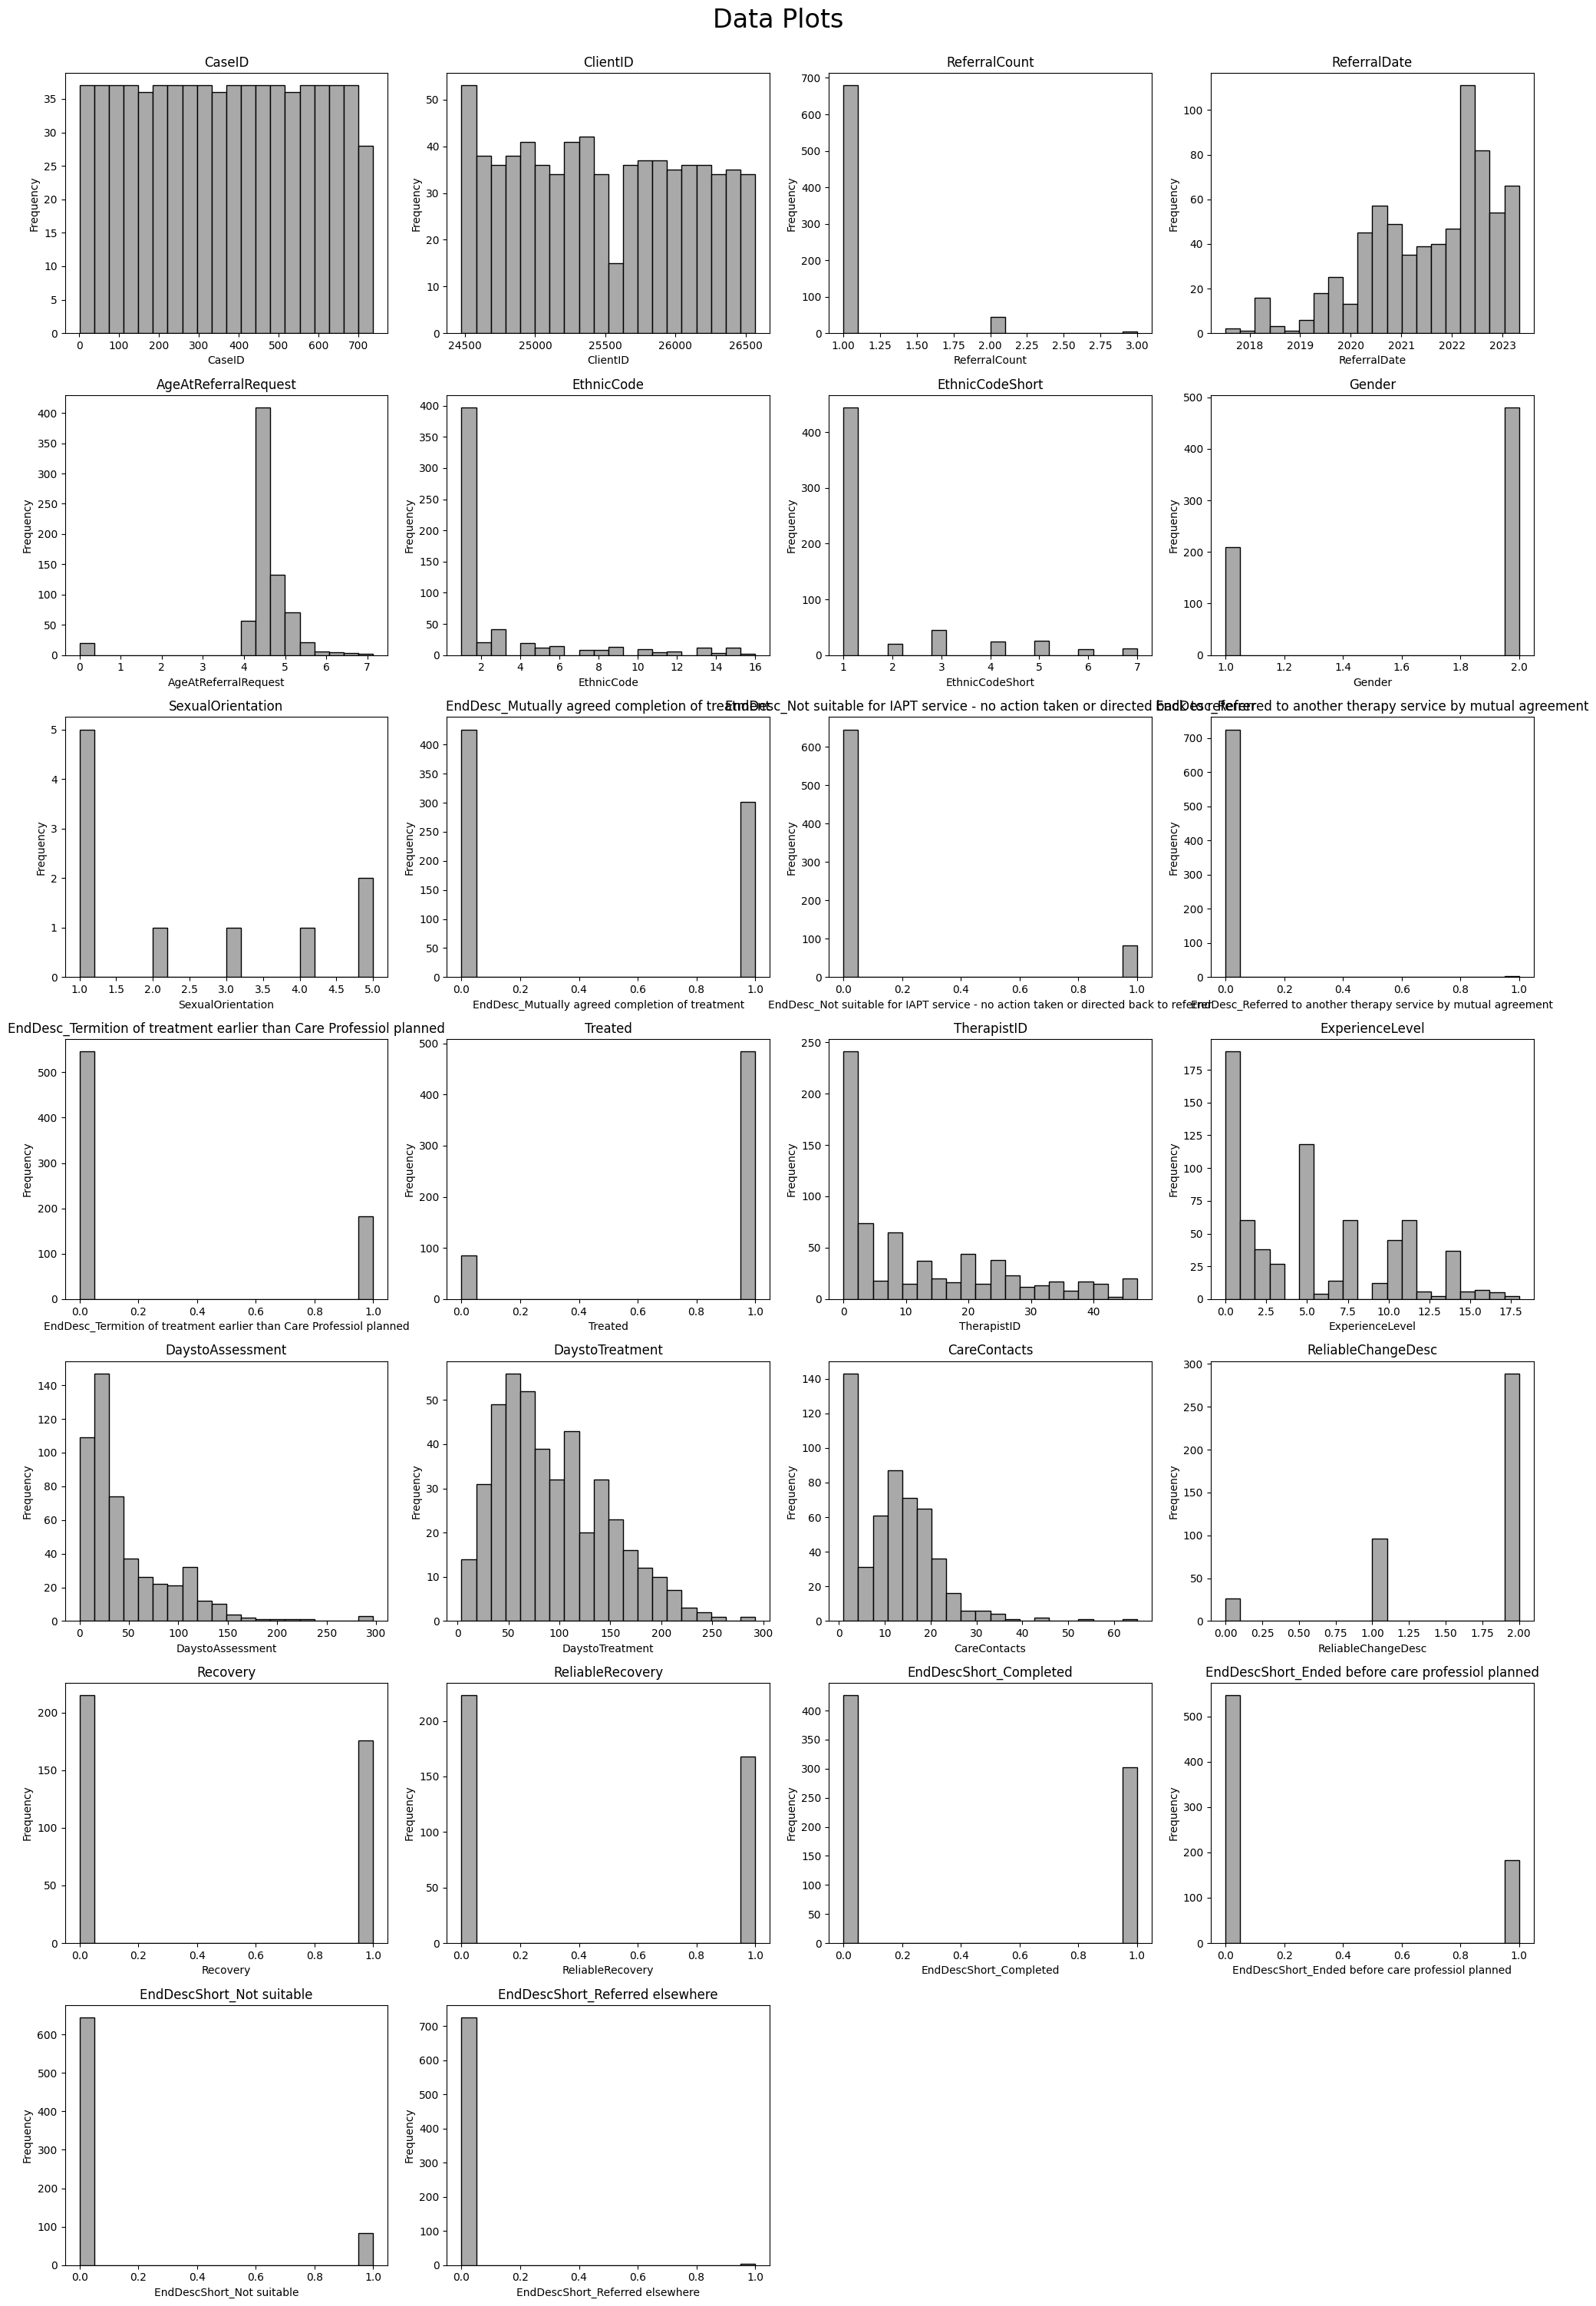

In [175]:
# figure size
plt.figure(figsize = (20, 30))

# histograms of variables
demo_df = df.iloc[:, 0:26]
dem_plots_cols = len(demo_df.columns)
dem_plots_rows = (dem_plots_cols // 4) + 1
for i, col in enumerate(demo_df.columns, start = 1):
    if demo_df[col].dtype in ['int64', 'float64', 'Int64', 'datetime64[ns]', 'bool']:
        data = demo_df[col].dropna()
        if demo_df[col].dtype == 'bool':  # convert boolean to integers
            data = data.astype(int)
        plt.subplot(dem_plots_rows, 4, i)
        plt.hist(data, bins = 20, color='darkgrey', edgecolor='black')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.suptitle('Data Plots', y = 1, fontsize = 24)
plt.tight_layout()
plt.show()

## 2.3 Questionnaire Data Preprocessing

Inspect the questionnaire data.

In [176]:
# questionnaire data
df.iloc[:, 27:].head()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,...,Item216,Item217,Item218,Item219,Item220,Item221,Item222,Item223,Item224,Item225
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,1,1,0,0,0,0,0
3,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# select object data
object_vars2 = df.iloc[:, 27:].select_dtypes(include = ['object'])

# unique values
lines_code = 5
for var in object_vars2.iloc[:, :lines_code]:
    unique_vals = df[var].unique()
    print(var)
    print(unique_vals)
    print()

Item126
['.' '2' '4' nan '3' '5' '1']

Item127
['.' '2' '3' nan '4' '5' '1']

Item128
['.' '4' nan '1' '2' '3' '5']

Item129
['.' '4' nan '1' '2' '3' '5']

Item130
['.' '4' nan '1' '2' '3']



Should change '.' to NaN and before thouroughly inspecting certain features, should try and remove them first.

In [178]:
# convert all variables to float
for col in df.columns[27:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce') # (I think this also removes '.')
    #df[col] = df[col].astype('Int64')

Converting features to the appropriate int type.

In [179]:
# item cols
item_cols = df.columns.str.contains('Item').tolist()
item_cols = df.columns[item_cols]
for col in item_cols:
    df[col] = df[col].apply(lambda x: x if pd.isna(x) or x.is_integer() else np.nan) # NaN non-integer values
    df[col] = df[col].astype('Int64') # convert to int

# threshold cols
thresh_cols = df.columns.str.contains('Threshold').tolist()
thresh_cols = df.columns[thresh_cols]
for col in thresh_cols:
    df[col] = df[col].apply(lambda x: x if pd.isna(x) or x.is_integer() else np.nan)
    df[col] = df[col].astype('Int64')

# total cols
total_cols = df.columns.str.contains('Total').tolist()
total_cols = df.columns[total_cols]
for col in total_cols:
    df[col] = df[col].apply(lambda x: x if pd.isna(x) or x.is_integer() else np.nan)
    df[col] = df[col].astype('Int64')

# bool cols (all)
bool_cols = df.select_dtypes(include = bool)
for col in bool_cols:
    df[col] = df[col].astype('Int64')

# 3. Explanatory Data Analysis

## 3.1 Functions and DataFrames

In [180]:
# item cols
item_cols = df.columns.str.contains('Item').tolist()
item_df = df.iloc[:, item_cols]

# threshold cols
thresh_cols = df.columns.str.contains('Threshold').tolist()
thresh_df = df.iloc[:, thresh_cols]

# total cols
total_cols = df.columns.str.contains('Total').tolist()
total_df = df.iloc[:, total_cols]

# datetime variables
datetime_cols = df.select_dtypes(include = ['datetime64']).columns
datetime_df = df[datetime_cols]

# # continious variables
# cont_cols = df.drop(columns = ordinal_cols).columns.tolist()
# cont_df = df[cont_cols]

# ordinal variables
ordinal_cols = df.select_dtypes(include = ['Int64', 'int64']).columns
ordinal_df = df[ordinal_cols]

# non-datetime variables
non_datetime_cols = df.select_dtypes(exclude = ['datetime64']).columns
non_datetime_df = df[non_datetime_cols]





In [181]:
def single_summary_plot(df, tic_freq):

    statistics = df.describe()

    plt.figure(figsize=(6, 4))
    for index, row in statistics.iterrows():
        plt.plot(statistics.columns, row, label=index)

    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.title('Summary Statistics')
    plt.legend(loc = 'lower right')
    plt.xticks(statistics.columns[::tic_freq])
    plt.show()


In [182]:
def summary_plot(dfs, dfs_names):

    # subplot dimensions
    num_dfs = len(dfs)
    num_rows = num_dfs // 2 + num_dfs % 2

    # plot
    plt.figure(figsize=(15, 5 * num_rows))
    for i, df in enumerate(dfs):

        statistics = df.describe()

        plt.subplot(num_rows, 2, i+1)
        for index, row in statistics.iterrows():
            plt.plot(statistics.columns, row, label=index)

        plt.xlabel('Column')
        plt.ylabel('Value')
        plt.title(f'{dfs_names[i]} Summary')
        plt.xticks(statistics.columns[::2])
        plt.legend(loc = 'center right')

    plt.tight_layout()
    plt.show()


## 3.2 Non-questionnaire Data

The non-Questionnaire data.

In [183]:
df.describe()

,CaseID,ClientID,ReferralCount,ReferralDate,AgeAtReferralRequest,EthnicCode,EthnicCodeShort,Gender,SexualOrientation,EndDesc_Mutually agreed completion of treatment,...,Item216,Item217,Item218,Item219,Item220,Item221,Item222,Item223,Item224,Item225
count,728.000000,728.000000,728.000000,710,728.000000,581.0,583.0,689.0,10.0,728.0,...,367.0,375.0,350.0,376.0,379.0,378.0,380.0,373.0,378.0,377.0
mean,364.517857,25480.642857,1.072802,2021-08-04 14:17:54.929577472,4.520778,2.820998,1.713551,1.696662,2.4,0.414835,...,0.188011,0.053333,0.445714,0.444149,0.356201,0.478836,0.192105,0.27882,0.05291,0.039788
min,1.000000,24475.000000,1.000000,2017-07-11 00:00:00,0.000000,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,182.750000,24939.000000,1.000000,2020-08-29 18:00:00,4.358899,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,364.500000,25427.500000,1.000000,2021-11-26 12:00:00,4.472136,1.0,1.0,2.0,1.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,546.250000,26022.750000,1.000000,2022-07-24 00:00:00,4.690416,3.0,1.0,2.0,3.75,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
max,737.000000,26567.000000,3.000000,2023-04-30 00:00:00,7.141428,16.0,7.0,2.0,5.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,210.330956,619.024597,0.280355,NaN,0.855073,3.571772,1.466208,0.460034,1.712698,0.493032,...,0.391254,0.224998,0.497756,0.497533,0.479508,0.500214,0.394475,0.449021,0.224151,0.19572


** **insert EDA plots of non-questionnaire data** **

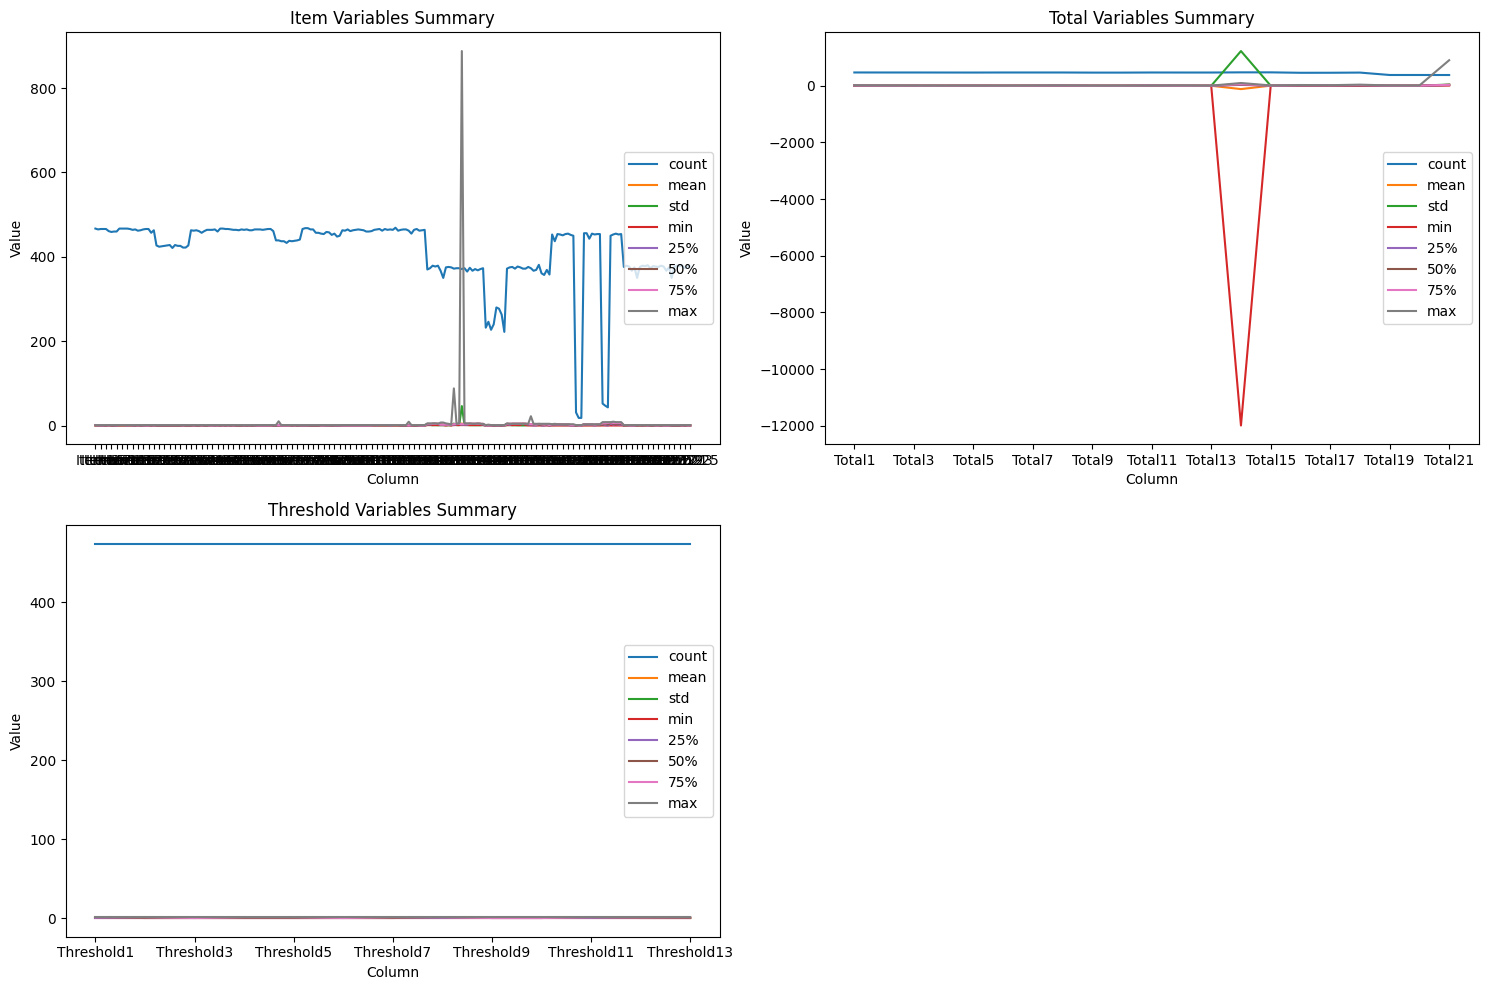

In [184]:
# questionnaire data summary
dfs = [item_df, total_df, thresh_df]
dfs_names = ['Item Variables', 'Total Variables', 'Threshold Variables']
summary_plot(dfs, dfs_names)

## 3.3 Questionnaire Data

Looking at the questionnaire data.

In [185]:
item_df.describe()

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,...,Item216,Item217,Item218,Item219,Item220,Item221,Item222,Item223,Item224,Item225
count,467.0,465.0,466.0,466.0,466.0,461.0,459.0,460.0,460.0,467.0,...,367.0,375.0,350.0,376.0,379.0,378.0,380.0,373.0,378.0,377.0
mean,0.946467,0.533333,0.716738,0.733906,0.392704,0.247289,0.431373,0.402174,0.513043,0.875803,...,0.188011,0.053333,0.445714,0.444149,0.356201,0.478836,0.192105,0.27882,0.05291,0.039788
std,0.225336,0.499425,0.451067,0.442389,0.488877,0.431905,0.495808,0.490871,0.500374,0.33016,...,0.391254,0.224998,0.497756,0.497533,0.479508,0.500214,0.394475,0.449021,0.224151,0.19572
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


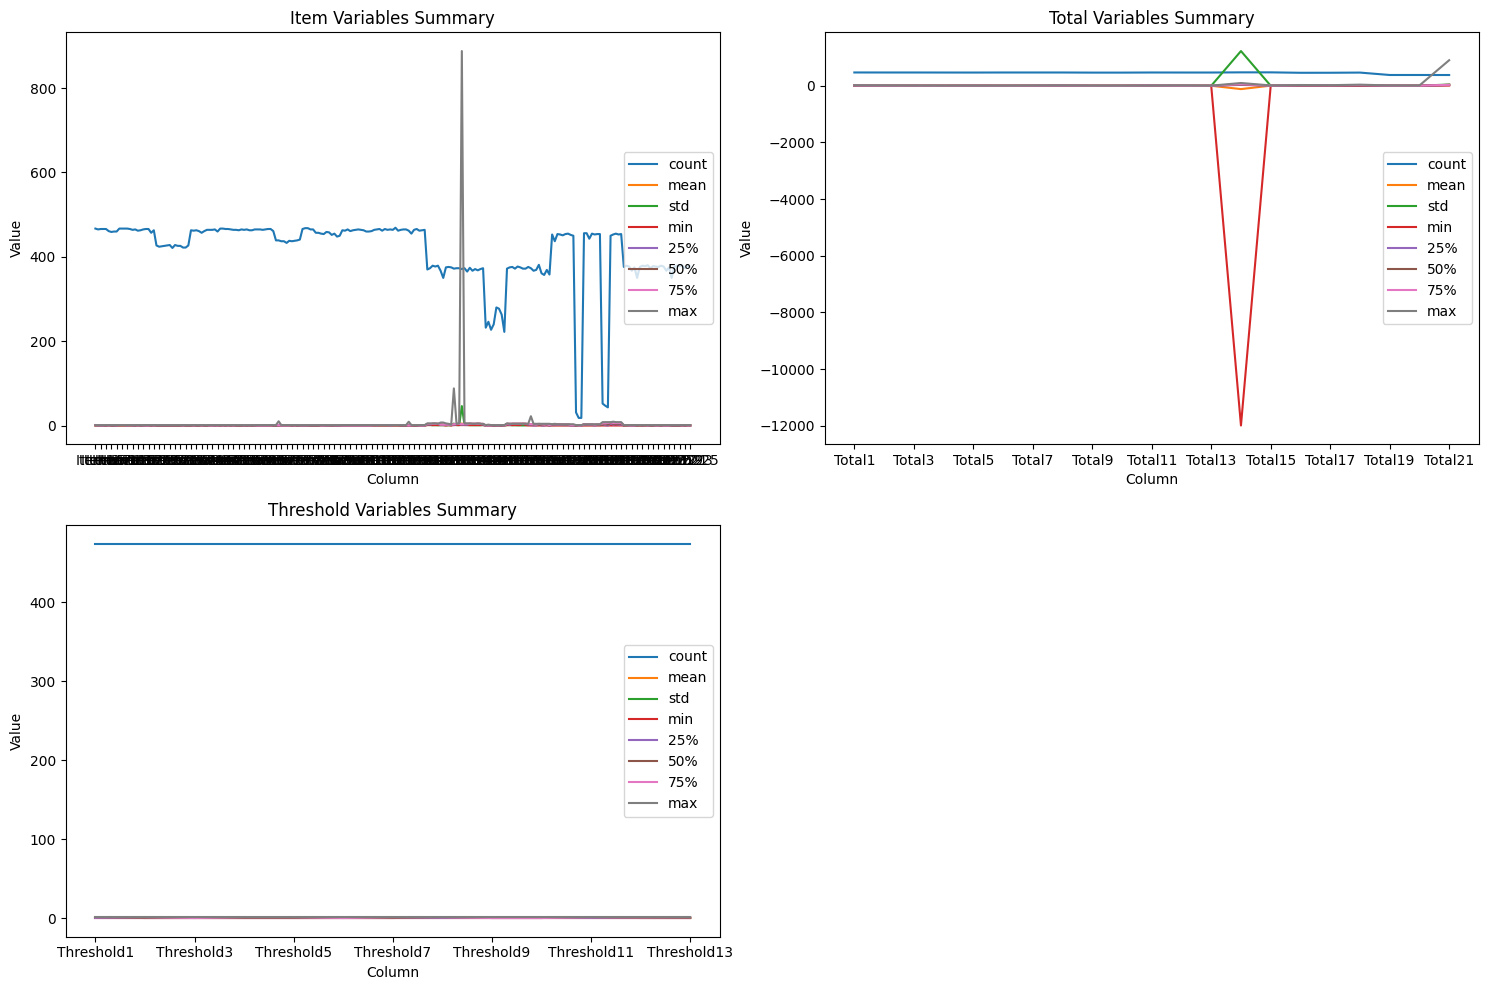

In [186]:
# questionnaire data summary
dfs = [item_df, total_df, thresh_df]
dfs_names = ['Item Variables', 'Total Variables', 'Threshold Variables']
summary_plot(dfs, dfs_names)

Items:
- Quite a lot

Totals:
- At least one negative value in Total14
- Some high values in Total21 too

Thresholds:
- Everything potentially ok in these variables

# 4. Data Preparation and Feature Engineering

## 4.1 Overview

In [187]:
# preparation packages
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# save data
eda_df = df

Preparation Tasks:
- Correlation
- Duplicates
- Outliers
- Missing Values
- Standardisation

Want to retain rows over columns, look at missing values within columns first

## 4.2 Duplicates

No Duplicates rows, some columns though.

In [188]:
# duplicated rows
df.duplicated().sum()

0

In [189]:
# duplicate columns
dupe_cols = np.transpose(df).duplicated()
dupe_cols.sum()

12

There are duplicate columns. Out of interest, what the duplicates are duplicates of is given below. (Check this, could be just so little entries recorded making it easier to be the same).

In [190]:
# find duplicate col names
dupe_cols = df.columns[dupe_cols].tolist()
dupes_of = {}
for col_name in dupe_cols:
    col_values = df[col_name]
    dupes = [other_col for other_col in df.columns if (other_col != col_name) and df[other_col].equals(col_values)]
    dupes_of[col_name] = dupes

# print dupes
for col_name, dupes in dupes_of.items():
    print(f'{col_name} is a duplicate of: {dupes}')

EndDescShort_Completed is a duplicate of: ['EndDesc_Mutually agreed completion of treatment']
EndDescShort_Ended before care professiol planned is a duplicate of: ['EndDesc_Termition of treatment earlier than Care Professiol planned']
EndDescShort_Not suitable is a duplicate of: ['EndDesc_Not suitable for IAPT service - no action taken or directed back to referrer']
EndDescShort_Referred elsewhere is a duplicate of: ['EndDesc_Referred to another therapy service by mutual agreement']
Item215 is a duplicate of: ['Item202']
Item216 is a duplicate of: ['Item203']
Item217 is a duplicate of: ['Item204']
Item218 is a duplicate of: ['Item205']
Item220 is a duplicate of: ['Item207']
Item222 is a duplicate of: ['Item209']
Item223 is a duplicate of: ['Item210']
Item225 is a duplicate of: ['Item212']


Removing these from the dataset.

In [191]:
# drop duplicate columns
df = df.drop(columns = dupe_cols)

## 4.3 Outliers

### Functions and DataFrames

In [192]:
# ordinal variables
ordinal_cols = df.select_dtypes(include = ['Int64', 'int64']).columns
ordinal_df = df[ordinal_cols]

# continious variables
cont_cols = df.drop(columns = ordinal_cols).columns.tolist()
cont_df = df[cont_cols]

# non-datetime variables
non_datetime_cols = df.select_dtypes(exclude = ['datetime64']).columns
non_datetime_df = df[non_datetime_cols]

# datetime variables
datetime_cols = df.select_dtypes(include = ['datetime64']).columns
datetime_df = df[datetime_cols]

# item cols
item_cols = df.columns.str.contains('Item').tolist()
item_df = df.iloc[:, item_cols]

# threshold cols
thresh_cols = df.columns.str.contains('Threshold').tolist()
thresh_df = df.iloc[:, thresh_cols]

# total cols
total_cols = df.columns.str.contains('Total').tolist()
total_df = df.iloc[:, total_cols]

In [193]:
# find col contents
def column_contents(df):
    outlier_cols = []
    for col in df.columns:
        if not df[col].isin([0, 1, pd.NA]).all():
            outlier_cols.append(col)
    if len(outlier_cols) == 0:
        print(f'Columns only contain 0, 1 and <NA>')
    else:
        print(f'Columns contining more than 0, 1 and <NA>: {outlier_cols}')
    return outlier_cols

# MAD function
def mad(df):
    med = df.median() # median
    devs = np.abs(df - med) # deviations
    mad_val = df.median() # MAD
    return mad_val

# modified Z-score function
def modified_zscore(df, threshold = 3.5):
    med = df.median() # median
    mad_val = mad(df) # MAD
    modified_zscores = 0.6745 * (df - med) / mad_val # modified Z-score
    return np.abs(modified_zscores) > threshold

# outlier counter and df function
def find_outlier_cols(df, threshold = 3.5):

    outlier_df = modified_zscore(df)
    outlier_cols = set()
    for col in outlier_df.columns:
        outlier_list = []
        for i, val in outlier_df[col].items():
            if pd.notna(val) and val:
                outlier_list.append(df.iloc[i][col])
        if outlier_list:
            outlier_cols.add(col)
            print(f'{col} outlier count: {len(outlier_list)}')

    # return outlier_df
    outlier_cols = list(outlier_cols)
    outlier_df = df[outlier_cols]
    return outlier_df

# plot outlier cols
def plot_outlier_cols(outlier_df, title, legend=True):
    outlier_df.plot(figsize = (5, 3))
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Total Score')
    if not legend:
        plt.gca().legend([])
    else:
        plt.legend(loc='upper right')
    plt.show()

### Initial Cleaning

From the initial EDA, already seen that totals contain negative values when they should not, removing them will give a better understanding of the data.

In [194]:
# replace negative totals with nan
for col in total_df:
    df.loc[df[col] < 0, col] = np.nan # replace in df
    total_df.loc[total_df[col] < 0, col] = np.nan # replace in total_df

### Non-questionnaire Outliers

### Questionnaire Outliers

Viewing the potential data containing outliers.

In [195]:
# detect whether cols are just 0,1,na
thresh_pot_cols = column_contents(thresh_df)
item_pot_cols = column_contents(item_df)
total_pot_cols = column_contents(total_df)

Columns only contain 0, 1 and <NA>
Columns contining more than 0, 1 and <NA>: ['Item70', 'Item119', 'Item126', 'Item127', 'Item128', 'Item129', 'Item130', 'Item131', 'Item132', 'Item133', 'Item134', 'Item135', 'Item136', 'Item137', 'Item138', 'Item139', 'Item140', 'Item141', 'Item142', 'Item143', 'Item144', 'Item145', 'Item146', 'Item147', 'Item149', 'Item156', 'Item157', 'Item158', 'Item159', 'Item160', 'Item161', 'Item162', 'Item163', 'Item164', 'Item165', 'Item166', 'Item167', 'Item168', 'Item169', 'Item170', 'Item171', 'Item172', 'Item173', 'Item174', 'Item175', 'Item176', 'Item177', 'Item178', 'Item179', 'Item180', 'Item181', 'Item185', 'Item186', 'Item187', 'Item188', 'Item189', 'Item190', 'Item191', 'Item192', 'Item193', 'Item194', 'Item195', 'Item196', 'Item197', 'Item198', 'Item199']
Columns contining more than 0, 1 and <NA>: ['Total1', 'Total2', 'Total3', 'Total4', 'Total5', 'Total6', 'Total7', 'Total8', 'Total9', 'Total10', 'Total11', 'Total12', 'Total13', 'Total14', 'Total1

Initial Beliefs
- Treshold varibles contain no outliers as there are only 0 and 1s
- Constant columns and quasi constant columns will be explored and removed later
- Potential outliers in Items and Totals

In [196]:
# potential columns containing outliers (shortening the search, only these can contain outliers)
total_pot_df = total_df[total_pot_cols]
item_pot_df = item_df[item_pot_cols]

# find outliers in Total variables
total_outlier_df = find_outlier_cols(total_pot_df)
print('\n')
item_outlier_df = find_outlier_cols(item_pot_df)

Total3 outlier count: 83
Total4 outlier count: 13
Total6 outlier count: 140
Total9 outlier count: 134
Total10 outlier count: 45
Total12 outlier count: 1
Total13 outlier count: 170
Total21 outlier count: 1


Item70 outlier count: 1
Item119 outlier count: 75
Item136 outlier count: 1
Item139 outlier count: 1
Item149 outlier count: 40
Item165 outlier count: 1
Item172 outlier count: 160


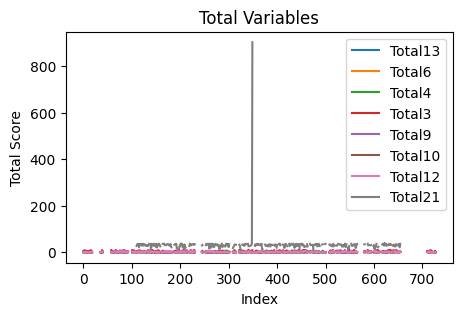

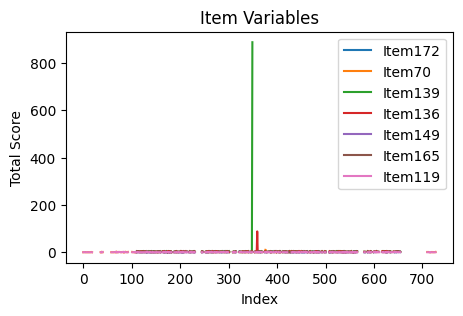

In [197]:
# plot outlier cols
plot_outlier_cols(total_outlier_df, 'Total Variables')
plot_outlier_cols(item_outlier_df, 'Item Variables')

Clearly the two massive distinct spikes are mistakes, removing these initally and takin another look before removing the other spike in the second plot seems resonable.

In [198]:
# replace outliers with nan
for col in total_outlier_df:
    df.loc[df[col] > 200, col] = np.nan
    total_outlier_df.loc[total_outlier_df[col] > 200, col] = np.nan

for col in item_outlier_df:
    df.loc[df[col] > 50, col] = np.nan
    item_outlier_df.loc[item_outlier_df[col] > 50, col] = np.nan

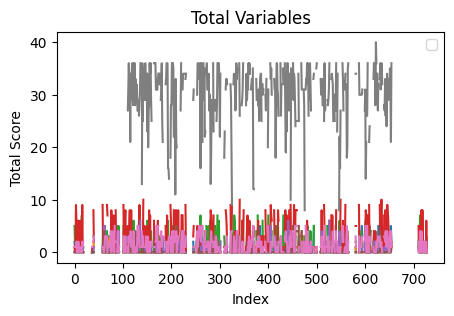

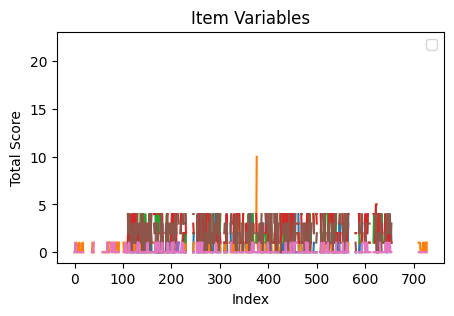

In [199]:
# plot outlier cols
plot_outlier_cols(total_outlier_df, 'Total Variables', legend=False)
plot_outlier_cols(item_outlier_df, 'Item Variables', legend=False)

Totals:
- Since there are so many instances of 37 being the highest total in Total21 it seems unlikely one achived higher, so removed.
- No large unusual points left.
- Everything else seems to be ok, since there are not many observations it would be hard to determine if one is an outlier if the difference from the rest is so small.

Items:
- This spike must be a mistake for Item70, it seems unlikely there was an option of 10 when the rest are 0 and 1.
- Similarly with the other reasoning, there are too little observations to accurately determine if any others are mistsakes since the difference in scoring is so small now.

In [200]:
# replace outliers with nan
for col in total_outlier_df:
    df.loc[df[col] > 39, col] = np.nan
    total_outlier_df.loc[total_outlier_df[col] > 39, col] = np.nan

for col in item_outlier_df:
    df.loc[df[col] > 5, col] = np.nan
    item_outlier_df.loc[item_outlier_df[col] > 5, col] = np.nan

### Datetime Outliers

View histograms of the datetime varaibles to detect any outliers.

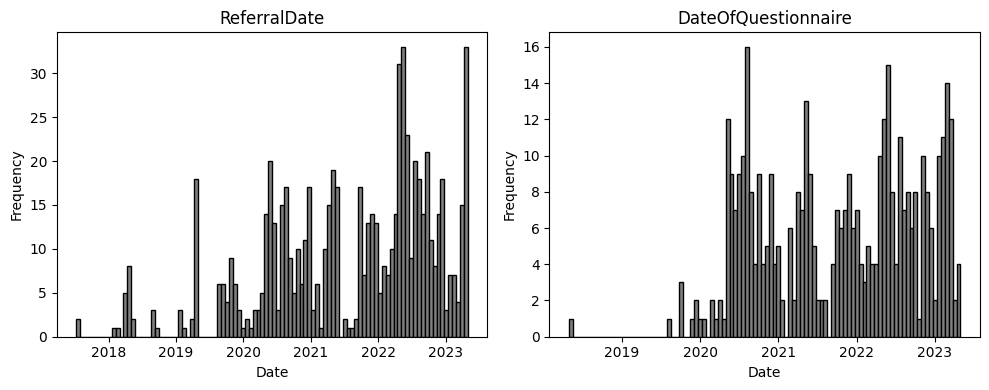

In [201]:
# Plot histograms for datetime data
plt.figure(figsize=(10, 4))
for i, col in enumerate(datetime_cols):
    plt.subplot(1, 2, i + 1)
    df[col].hist(bins = 100, color = 'grey', edgecolor = 'black')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.grid(False)
plt.tight_layout()
plt.show()

## 4.4 Constant and Quasi Constant Features

Removing useless constant columns.

In [202]:
# constant columns
const_cols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns = const_cols)

Exploring the data for any quasi constant features.

In [203]:
# ordinal variables
ordinal_cols = df.select_dtypes(include = ['Int64', 'int64']).columns
ordinal_df = df[ordinal_cols]

# continious variables
cont_cols = df.drop(columns = ordinal_cols).columns.tolist()
cont_df = df[cont_cols]

# non-datetime variables
non_datetime_cols = df.select_dtypes(exclude = ['datetime64']).columns
non_datetime_df = df[non_datetime_cols]

# datetime variables
datetime_cols = df.select_dtypes(include = ['datetime64']).columns
datetime_df = df[datetime_cols]

Datetime data does not work well with boxplots, instead make sure there is a spread of dates as there are only two variables.

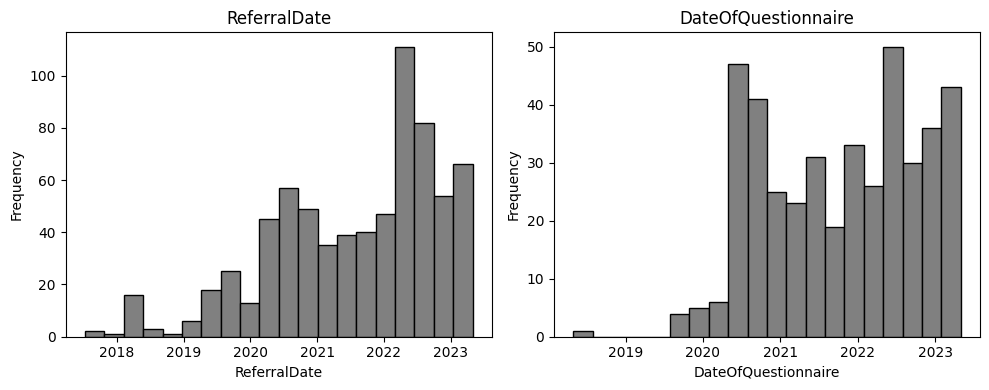

In [204]:
# histo of datetime cols
plt.figure(figsize = (10,4))
for i, col in enumerate(datetime_cols, 1):
    plt.subplot(1, len(datetime_cols), i)
    plt.hist(df[col], bins = 20, color = 'grey', edgecolor = 'black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
plt.tight_layout()
plt.show()

Viewing the variance across the continuous variables.

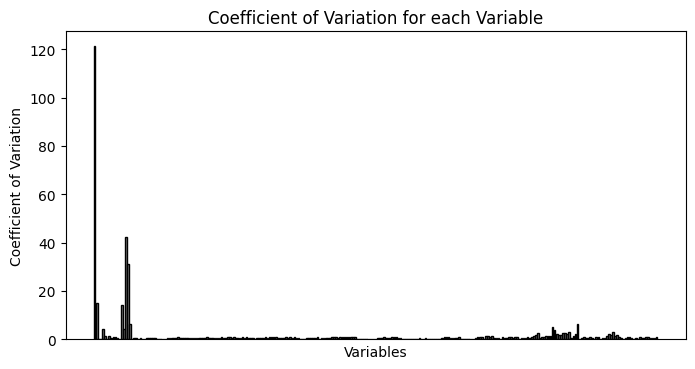

In [205]:
# coefficient of variance
cov = df[non_datetime_cols].var() / df[non_datetime_cols].mean()

# Plotting
plt.figure(figsize = (8, 4))
plt.bar(cov.index, cov.values, color = 'grey', edgecolor = 'black')
plt.xlabel('Variables')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation for each Variable')
plt.xticks([])
plt.show()

In [206]:
df['Total14'].nsmallest(20)

404     5
416     8
525    10
724    11
129    12
123    13
157    13
268    13
625    13
140    14
413    14
1      15
5      16
91     16
622    16
159    17
219    17
430    17
605    17
60     18
Name: Total14, dtype: Int64

In [207]:
# ordinal variables
ordinal_df = df.select_dtypes(include = ['int64'])

# select col modes
modes = ordinal_df.mode() # mode of each col
modes = modes.iloc[0] # select modes only

# calc quasi percentage
quasi_percentages = (ordinal_df == modes).sum() / len(ordinal_df) * 100 # how quasi a col is
quasi_percentages[:5]

CaseID              0.137363
ClientID            0.549451
ReferralCount      93.269231
EthnicCode         54.532967
EthnicCodeShort    60.989011
dtype: float64

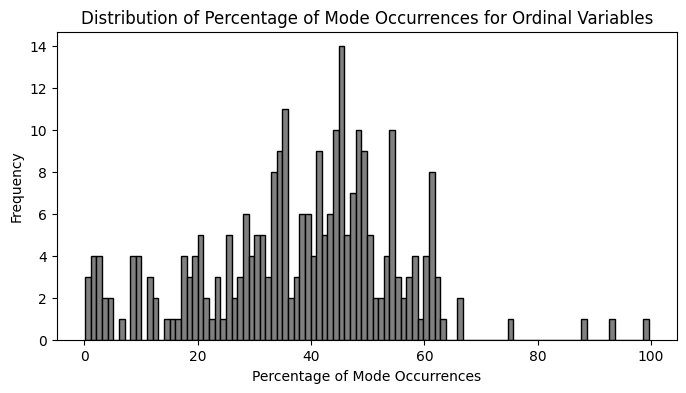

In [208]:
# Plotting
plt.figure(figsize=(8, 4))
plt.hist(quasi_percentages.values, bins = 100, color = 'grey', edgecolor = 'black')
plt.xlabel('Percentage of Mode Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Mode Occurrences for Ordinal Variables')
plt.show()

In [209]:
# remove quasi constant features
threshold = 99.5 # about 3 observations
exceeding_threshold_columns = quasi_percentages[quasi_percentages > threshold].index
df = df.drop(columns = exceeding_threshold_columns)

## 4.5 Correlation

Inspecting highly correlated variables, whilst also removing potential knowledge on the outcome. This includes anything that could ultimately provide deatil on the patients success in CBT or be used as a target variable.

In [210]:
# one hot encoded columns
EndDesc_cols = [col for col in df.columns if 'EndDesc' in col]
EndDescShort_cols = [col for col in df.columns if 'EndDescShort' in col] # none

In [211]:
# select explanatory variables
exp_vars = df.drop(columns = ['ReliableChangeDesc', 'Recovery', 'ReliableRecovery'] + EndDesc_cols + EndDescShort_cols)

# binary variables
binary_cols = [col for col in exp_vars.columns if exp_vars[col].nunique() == 2]
binary_df = exp_vars[binary_cols]

# ordinal variables
ordinal_cols = [col for col in exp_vars.columns if exp_vars[col].nunique() < 20]
ordinal_df = exp_vars[ordinal_cols]

# continious variables
cont_cols = exp_vars.drop(columns = binary_cols + ordinal_cols).columns.tolist()
cont_df = exp_vars[cont_cols]

In [212]:
# Create correlation matrices
cont_corr_matrix = cont_df.corr(method='pearson').abs()

ordinal_corr_matrix_spearman = ordinal_df.corr(method='spearman').abs()
ordinal_corr_matrix_kendall = ordinal_df.corr(method='kendall').abs()

cont_ordinal_corr_matrix_spearman = cont_df.corrwith(ordinal_df, method='spearman').abs()
cont_ordinal_corr_matrix_kendall = cont_df.corrwith(ordinal_df, method='kendall').abs()

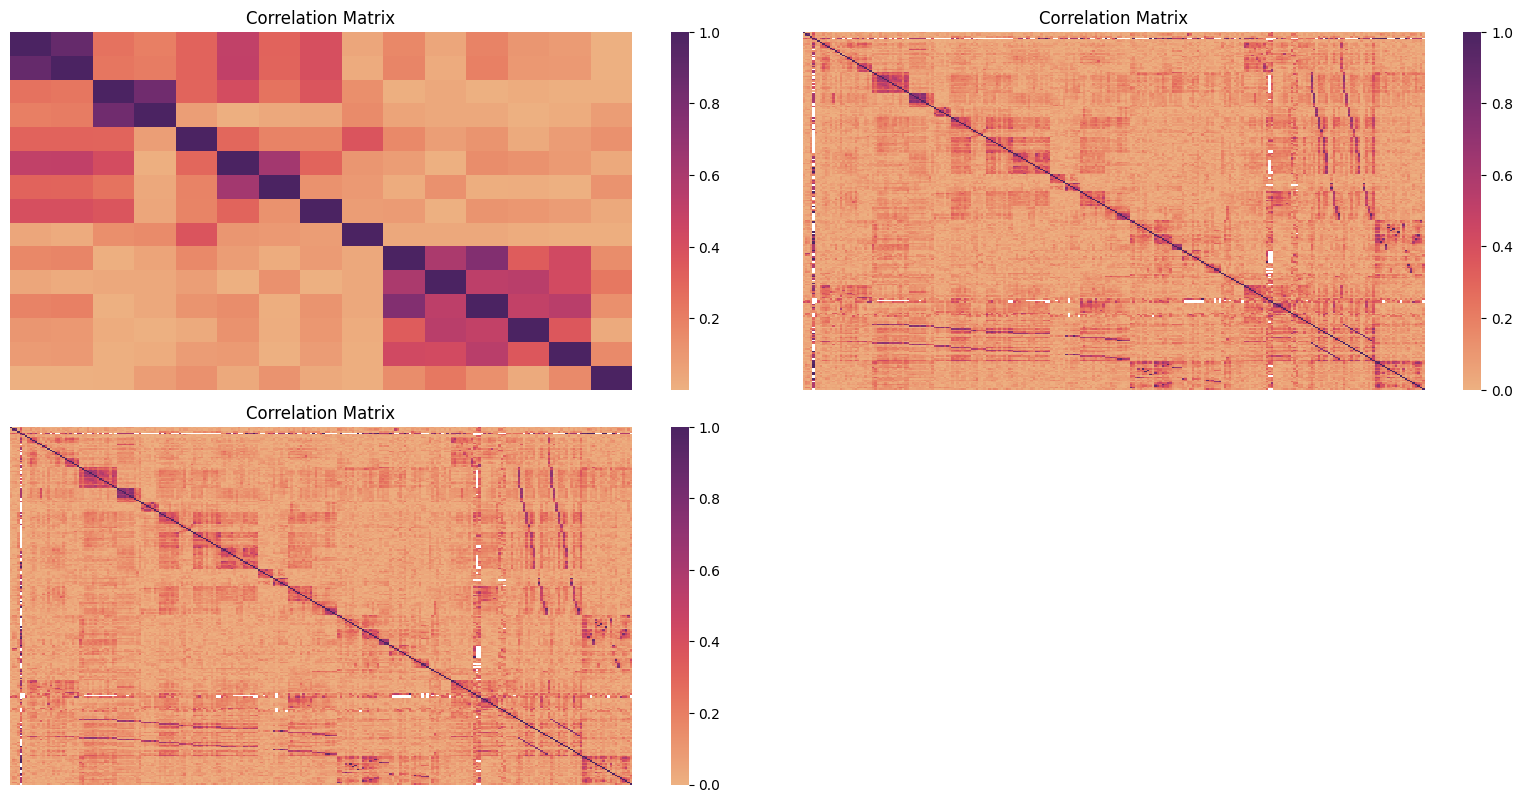

In [213]:
plt.figure(figsize=(16, 12))

plt.subplot(321)
sns.heatmap(cont_corr_matrix, annot = False, cmap = 'flare', fmt = ".2f", xticklabels = False, yticklabels = False)
plt.title('Correlation Matrix')

plt.subplot(322)
sns.heatmap(ordinal_corr_matrix_spearman, annot = False, cmap = 'flare', fmt = ".2f", xticklabels = False, yticklabels = False)
plt.title('Correlation Matrix')

plt.subplot(323)
sns.heatmap(ordinal_corr_matrix_kendall, annot = False, cmap = 'flare', fmt = ".2f", xticklabels = False, yticklabels = False)
plt.title('Correlation Matrix')

# plt.subplot(324)
# sns.heatmap(cont_ordinal_corr_matrix_spearman, annot = False, cmap = 'flare', fmt = ".2f", xticklabels = False, yticklabels = False)
# plt.title('Correlation Matrix')

# plt.subplot(325)
# sns.heatmap(cont_ordinal_corr_matrix_kendall, annot = False, cmap = 'flare', fmt = ".2f", xticklabels = False, yticklabels = False)
# plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [214]:
# Thresholds
thresholds = [0.7, 0.8, 0.9, 0.95, 1.0]

# Function to count correlated variable pairs above each threshold
def count_correlated_pairs(correlation_matrix, thresholds):
    counts = {}
    for threshold in thresholds:
        correlated_vars = (correlation_matrix.abs() > threshold)
        # Exclude diagonal and lower triangle (since correlation matrices are symmetric)
        np.fill_diagonal(correlated_vars.values, False)
        upper_triangle = correlated_vars.values[np.triu_indices_from(correlated_vars, k=1)]
        count = np.sum(upper_triangle)
        counts[threshold] = count
    return counts

# Count correlated variable pairs for each correlation matrix
print("Number of variable pairs correlated above each threshold:")
print("Continuous-Continuous Correlation (Pearson):")
counts_cont = count_correlated_pairs(cont_corr_matrix, thresholds)
for threshold, count in counts_cont.items():
    print(f"{threshold * 100}%: {count}")

print("\nOrdinal-Ordinal Correlation (Spearman):")
counts_ordinal_spearman = count_correlated_pairs(ordinal_corr_matrix_spearman, thresholds)
for threshold, count in counts_ordinal_spearman.items():
    print(f"{threshold * 100}%: {count}")

print("\nOrdinal-Ordinal Correlation (Kendall):")
counts_ordinal_kendall = count_correlated_pairs(ordinal_corr_matrix_kendall, thresholds)
for threshold, count in counts_ordinal_kendall.items():
    print(f"{threshold * 100}%: {count}")

Number of variable pairs correlated above each threshold:
Continuous-Continuous Correlation (Pearson):
70.0%: 3
80.0%: 2
90.0%: 0
95.0%: 0
100.0%: 0

Ordinal-Ordinal Correlation (Spearman):
70.0%: 126
80.0%: 64
90.0%: 35
95.0%: 21
100.0%: 0

Ordinal-Ordinal Correlation (Kendall):
70.0%: 100
80.0%: 48
90.0%: 24
95.0%: 20
100.0%: 0


In [215]:
# remove highly correlated variables
def drop_corr_cols(df, corr_matrix, threshold=0.95, ignore=True):
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    corr_cols = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]

    try:
        df = df.drop(corr_cols, axis=1)
    except KeyError as e:
        if ignore:
            print(f"Ignoring KeyError: {e}")
        else:
            raise

    return df

df = drop_corr_cols(df, cont_corr_matrix)
df = drop_corr_cols(df, ordinal_corr_matrix_spearman)
df = drop_corr_cols(df, ordinal_corr_matrix_kendall)

Ignoring KeyError: "['Item89', 'Item92', 'Item106', 'Item116', 'Item120', 'Item134', 'Item142', 'Item147', 'Item153', 'Item182', 'Threshold8', 'Item200', 'Item201', 'Item202', 'Item203', 'Item205', 'Item206', 'Item207', 'Item210'] not found in axis"


## 4.6 Missing Values within Columns

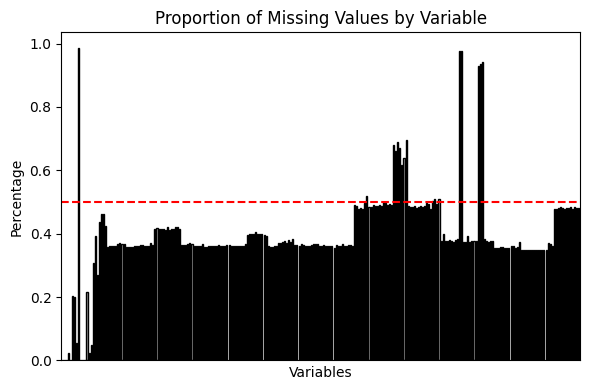

In [216]:
# number of unknowns in data
df.isna().sum() # not shown

# missing values
missing_value_percentage = df.isna().sum() / df.shape[0]
plt.figure(figsize = (6, 4))
missing_value_percentage.plot(kind = 'bar', color='darkgrey', edgecolor='black')
plt.title('Proportion of Missing Values by Variable')
plt.xlabel('Variables')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y = 0.5, color='red', linestyle='--')  # line at 50%
plt.tight_layout()

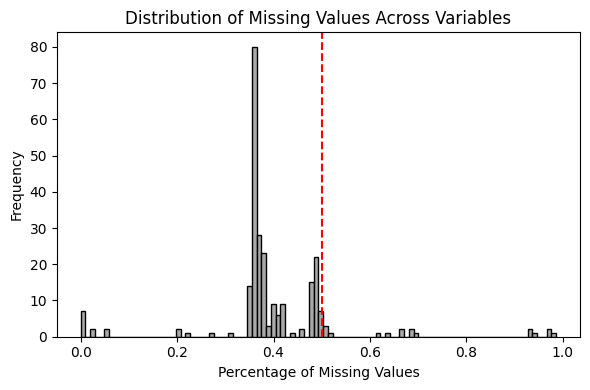

In [217]:
# Calculate the proportion of missing values for each variable
missing_value_percentage = df.isna().sum() / df.shape[0]

# Plotting the histogram
plt.figure(figsize=(6, 4))
plt.hist(missing_value_percentage, bins = 100, color='darkgrey', edgecolor='black')
plt.title('Distribution of Missing Values Across Variables')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--')  # Line at 50%
plt.tight_layout()
plt.show()

In [218]:
# number of unknowns in data
df.isna().sum() # not shown

CaseID                    0
ClientID                  0
ReferralCount             0
ReferralDate             18
AgeAtReferralRequest      0
                       ... 
Item213                 352
Item214                 349
Item219                 352
Item221                 350
Item224                 350
Length: 252, dtype: int64

In [219]:
# Drop columns exceeding 50% missing values
missing_value_threshold = 0.5
drop_cols = missing_value_percentage[missing_value_percentage > missing_value_threshold].index
df = df.drop(drop_cols, axis=1)

Columns with 50% missing data were removed.

## 4.7 Missing Data within Rows

In [220]:
df.isna().sum(axis = 1) # not shown


0      48
1      45
2       0
3      45
4      58
       ..
723    58
724    62
725    59
726    58
727    58
Length: 728, dtype: int64

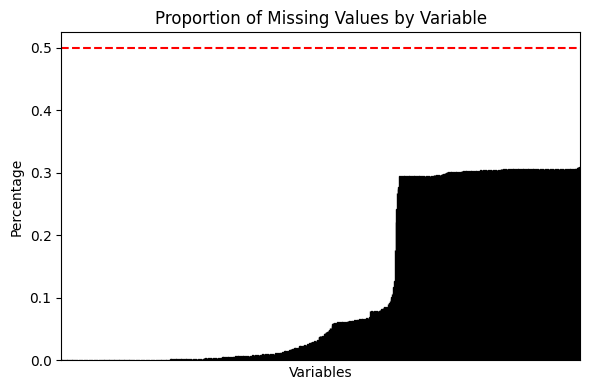

In [221]:
# number of unknowns in data
df.transpose().isna().sum(axis = 1) # not shown

# missing values
missing_value_percentage = df.isna().sum(axis = 1).sort_values() / df.shape[0]
plt.figure(figsize = (6, 4))
missing_value_percentage.plot(kind = 'bar', color='darkgrey', edgecolor='black')
plt.title('Proportion of Missing Values by Variable')
plt.xlabel('Variables')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y = 0.5, color='red', linestyle='--')  # line at 50%
plt.tight_layout()
plt.show()

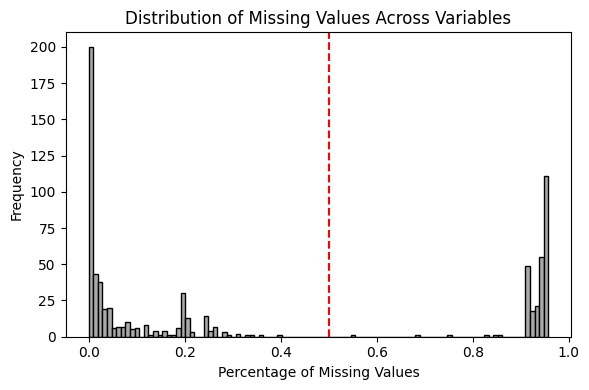

In [222]:
# Calculate the proportion of missing values for each variable
missing_value_percentage = df.isna().sum(axis = 1) / df.shape[1]

# Plotting the histogram
plt.figure(figsize=(6, 4))
plt.hist(missing_value_percentage, bins = 100, color='darkgrey', edgecolor='black')
plt.title('Distribution of Missing Values Across Variables')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--')  # Line at 50%
plt.tight_layout()
plt.show()

The aim is to retain as much data as possible, especially since there is not a lot as it is. Luckily non seem to exceed 70%, very few above 50%. It would be best not to remove anything at this point.

## 4.8 Imputation

In [223]:
# select missing data
missing_vals = df.isna().sum()
missing_ordered = missing_vals.sort_values() # impute variables with least missing values first
missing_ordered = df[missing_ordered.index].drop(columns = ['ReliableChangeDesc',
                                                            'Recovery',
                                                            'ReliableRecovery']
                                                 + EndDesc_cols
                                                 + EndDescShort_cols)

# binary variables
binary_cols = [col for col in missing_ordered.columns if missing_ordered[col].nunique() == 2]

# ordinal variables
ordinal_cols = list(missing_ordered.select_dtypes(include='Int64').columns)

# continuous variables
cont_cols = missing_ordered.drop(columns = binary_cols + ordinal_cols).columns.tolist()

# impute missing values with mean
mean_imputer = SimpleImputer(strategy='mean')
for col in missing_ordered.columns:
    if df[col].isna().sum() > 0:
        df[[col]] = mean_imputer.fit_transform(df[[col]])

# # impute missing values with KNN
# KNN_imputer = KNNImputer(n_neighbors=3)
# for col in missing_ordered.columns:
#     if df[col].isna().sum() > 0:
#         df[col] = KNN_imputer.fit_transform(df[[col]])

# Convert imputed values for binary and ordinal variables to discrete values
for col in binary_cols:
    df[col] = df[col].round().astype(int)

for col in ordinal_cols:
    df[col] = df[col].round().astype(int)

In [224]:
# # impute missing values with KNN
# KNN_imputer = KNNImputer(n_neighbors = 5)
# imputed_values = KNN_imputer.fit_transform(missing_ordered)

# # Convert imputed values for binary and ordinal variables to discrete values
# imputed_df = pd.DataFrame(imputed_values, columns = missing_ordered.columns)
# for column in binary_cols:
#     imputed_df[column] = imputed_df[column].round().astype(int)

# for column in ordinal_cols:
#     imputed_df[column] = imputed_df[column].round().astype(int)

# # Separate imputed binary, ordinal, and continuous variables
# binary_df = imputed_df[binary_cols]
# ordinal_df = imputed_df[ordinal_cols]
# cont_df = imputed_df.drop(columns=binary_cols + ordinal_cols)

# # impute missing values with KNN
# KNN_imputer = KNNImputer(n_neighbors=5)
# for column in missing_ordered.columns:
#     if df[column].isna().sum() > 0:
#         df[column] = KNN_imputer.fit_transform(df[[column]])

# 5. Modelling

## 5.1 Overview

In [225]:
# machine learning models
from xgboost import XGBClassifier

# model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# save data
pro_df = df

In [226]:
# transform dataset into numerical X and y matricies (for scikit learn)
sample = df

# drop rows missing target varaible
target_var = 'ReliableRecovery'
sample = sample.dropna(subset = [target_var])

# separate explanatory and response variabels
X = sample.drop(['ReliableChangeDesc', 'ReliableRecovery', 'Recovery'] + EndDesc_cols + EndDescShort_cols, axis = 1)
y = sample['Recovery']

cols = X.columns

In [227]:
(df['ReliableChangeDesc'].isna() & df['Recovery'].isna()).sum()

317

## 5.2 Functions

### XGBoost

In [228]:
def XGBoost_ModelSelection(X, y, pipeline, param_grid, k = 5):

    # initialise lists
    scores = []
    preds = []
    actuals = []

    # k-fold CV
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X, y):

        # train and test data for CV
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # finding optimal models, hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv = kf, scoring = 'accuracy', verbose = 0, n_jobs = -1)
        grid_search.fit(X_train, y_train)
        print("Internal CV Accuracy of estimator: {}".format(grid_search.best_score_))

        # number of features selected
        estimator = grid_search.best_estimator_

        # Access the SelectFromModel transformer and get the support mask
        support = estimator.named_steps['FS'].get_support()
        num_feat = np.sum(support)
        print("Number of selected features {0}".format(num_feat))

        # features selected
        col_index = np.where(support)[0]
        col_names = [cols[col] for col in col_index]
        print("Selected features {0}".format(col_names))

        # print hyperparameters selected
        print("Max depth {0}".format(estimator.named_steps["classifier"].max_depth))
        print("Number of trees {0}".format(estimator.named_steps["classifier"].n_estimators))
        print("Learning rate {0}".format(estimator.named_steps["classifier"].learning_rate))
        # additional tree specific hyperparameters
        print("Minimum child weight {0}".format(estimator.named_steps["classifier"].min_child_weight))
        print("Subsample {0}".format(estimator.named_steps["classifier"].subsample))
        print("Colsample bytree {0}".format(estimator.named_steps["classifier"].colsample_bytree))
        # additional learning specific hyperparameters
        print("Gamma {0}".format(estimator.named_steps["classifier"].gamma))
        print("Lambda {0}".format(estimator.named_steps["classifier"].reg_lambda))
        print("Alpha {0}".format(estimator.named_steps["classifier"].reg_alpha))

        # predicting the test data with the omptimised models
        predictions = estimator.predict(X_test)
        score = metrics.accuracy_score(y_test, predictions)
        scores.append(score)
        print('Accuracy performance on this test set: {}'.format(score))

        print("--------------------------------------------------")

        probs = estimator.predict_proba(X_test)[:, 1]
        preds.extend(probs)
        actuals.extend(y_test)

    return scores, preds, actuals


## 5.3 XGBoost

In [229]:
# XGBoost classifier (with specific parameters)
classifier = XGBClassifier()

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with XGBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

### Model 1

In [ ]:
# hyperparameters for XGBoost and feature selector
param_grid1 = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [200, 500],
    classifier__max_depth = [3, 5],
    classifier__learning_rate = [0.01, 0.1],
    classifier__subsample = [0.5, 1.0],
    classifier__colsample_bytree = [0.5, 1.0])

xgb_class1 = XGBoost_ModelSelection(X, y, pipeline, param_grid1, k = 5)

Internal CV Accuracy of estimator: 0.6250384024577572
Number of selected features 83
Selected features ['CaseID', 'ReferralCount', 'ReferralDate', 'EthnicCode', 'EthnicCodeShort', 'Treated', 'TherapistID', 'ExperienceLevel', 'DaystoAssessment', 'DaystoTreatment', 'CareContacts', 'DateOfQuestionnaire', 'Item4', 'Item6', 'Item7', 'Item9', 'Item12', 'Item15', 'Item21', 'Item22', 'Item28', 'Item29', 'Item37', 'Item40', 'Item41', 'Item46', 'Item47', 'Item49', 'Item55', 'Item59', 'Item63', 'Item68', 'Item73', 'Item75', 'Item77', 'Item79', 'Item81', 'Item83', 'Item84', 'Item85', 'Item88', 'Item94', 'Item97', 'Item117', 'Item119', 'Item137', 'Item139', 'Item145', 'Item156', 'Item164', 'Item165', 'Item167', 'Item168', 'Item171', 'Item173', 'Item174', 'Item176', 'Item177', 'Item178', 'Item181', 'Item185', 'Item186', 'Item187', 'Item189', 'Item190', 'Item191', 'Item195', 'Item197', 'Item198', 'Item199', 'Total1', 'Total5', 'Total6', 'Total9', 'Total11', 'Total12', 'Total14', 'Total15', 'Total17',

In [ ]:
scores1 = xgb_class1[0]
preds1 = xgb_class1[1]
actuals1 = xgb_class1[2]

# Report the overall F1 score
print("Average Accuracy score: {0}".format(np.average(scores1)))

prec1, recall1, _ = metrics.precision_recall_curve(actuals1, preds1)
print("AUPRC score: {0}".format(metrics.auc(recall1, prec1)))

# Generate the PR curve
plt.plot(recall1, prec1, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
# Convert probabilities to binary predictions
threshold = 0.5  # You can adjust the threshold if needed
binary_preds1 = [1 if pred >= threshold else 0 for pred in preds1]

# Generate confusion matrix
conf_matrix = confusion_matrix(actuals1, binary_preds1)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Model 2

In [162]:
# hyperparameters for XGBoost and feature selector
param_grid2 = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [400, 500, 600],
    classifier__max_depth = [5, 7, 10],
    classifier__learning_rate = [0.05, 0.1, 0.5],
    classifier__min_child_weight = [0, 1],
    classifier__subsample = [0.8, 1],
    classifier__colsample_bytree = [0.8, 1],
    classifier__gamma = [0, 0.01],
    classifier__lambda = [0, 0.01],
    classifier__alpha = [0, 0.01])

xgb_class2 = XGBoost_ModelSelection(X, y, pipeline, param_grid2, k = 5)

Internal CV Accuracy of estimator: 0.6667690732206861
Number of selected features 115
Selected features ['CaseID', 'ReferralDate', 'AgeAtReferralRequest', 'EthnicCode', 'EthnicCodeShort', 'Gender', 'Treated', 'TherapistID', 'ExperienceLevel', 'DaystoAssessment', 'DaystoTreatment', 'CareContacts', 'DateOfQuestionnaire', 'Item2', 'Item5', 'Item6', 'Item7', 'Item12', 'Item13', 'Item14', 'Item17', 'Item18', 'Item19', 'Item24', 'Item33', 'Item36', 'Item37', 'Item38', 'Item39', 'Item43', 'Item44', 'Item47', 'Item48', 'Item50', 'Item58', 'Item59', 'Item63', 'Item68', 'Item73', 'Item75', 'Item77', 'Item80', 'Item81', 'Item82', 'Item83', 'Item84', 'Item85', 'Item88', 'Item90', 'Item91', 'Item93', 'Item97', 'Item103', 'Item107', 'Item108', 'Item109', 'Item112', 'Item114', 'Item115', 'Item117', 'Item121', 'Item123', 'Item126', 'Item127', 'Item136', 'Item137', 'Item139', 'Item140', 'Item141', 'Item145', 'Item156', 'Item157', 'Item159', 'Item164', 'Item165', 'Item166', 'Item167', 'Item168', 'Item17

KeyboardInterrupt: 

In [ ]:
scores2 = xgb_class2[0]
preds2 = xgb_class2[1]
actuals2 = xgb_class2[2]

# Report the overall F1 score
print("Average F1 score: {0}".format(np.average(scores2)))

prec2, recall2, _ = metrics.precision_recall_curve(actuals2, preds2)
print("AUPRC score: {0}".format(metrics.auc(recall2, prec2)))

# Generate the PR curve
plt.plot(recall2, prec2, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Final Model

In [ ]:
# Initialize XGBoost classifier with best hyperparameters
best_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_child_weight': None,
    'subsample': 1.0,
    'colsample_bytree': 0.5,
    'gamma': None,
    'reg_lambda': None,
    'reg_alpha': None
}

xgb_classifier = XGBClassifier(**best_params)

# Feature selector
feature_selector = SelectFromModel(xgb_classifier)

# Create a pipeline
pipeline = Pipeline([
    ('FS', feature_selector),
    ('classifier', xgb_classifier)
])

# Train the model on the entire dataset
pipeline.fit(X, y)

In [ ]:
# # create new row
# new_row = pd.Series([np.nan] * len(df.columns), index=df.columns)
# new_df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

# # Adding new values to the last row
# new_df.loc[new_df.index[-1], 'ReferralCount'] = 1
# new_df.loc[new_df.index[-1], 'EthnicCode'] = 1
# new_df.loc[new_df.index[-1], 'EthnicCodeShort'] = 1
# new_df.loc[new_df.index[-1], 'Gender'] = 1

# new_df.iloc[-2:, :]

# # Use the trained pipeline to make predictions on the new data
# predictions = pipeline.predict(new_data_df)

# # Print the predictions
# print(predictions)

In [ ]:
# 1. Select a random row from the DataFrame
random_row = df.sample(n=1, random_state=2001)

# 2. Prepare the features (X) for prediction
X_pred = random_row.drop(columns=['Recovery'])  # Remove the target column if it exists

# 3. Apply feature selection to the prediction data
X_pred_selected = feature_selector.transform(X_pred)

# 4. Get the feature names selected by the feature selector
selected_features = X.columns[feature_selector.get_support()]

# 5. Ensure that the feature names in the prediction data match the selected feature names
X_pred_selected = pd.DataFrame(X_pred_selected, columns=selected_features)

# 6. Use the pipeline to make predictions
prediction = pipeline.predict(X_pred_selected)

print("Predicted class:", prediction)


## 5.3 XGBoost

In [ ]:
# XGBoost classifier (with specific parameters)
classifier = XGBClassifier()

# feature selection with SelectFromModel
selector = SelectFromModel(classifier)

# pipeline with XGBoost and SelectFromModel
pipeline = Pipeline([("FS", selector), ("classifier", classifier)])

### Model 1

In [ ]:
# hyperparameters for XGBoost and feature selector
param_grid1 = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [200, 400],
    classifier__max_depth = [3, 5],
    classifier__learning_rate = [0.1, 0.5],
    classifier__subsample = [0.5, 1.0],
    classifier__colsample_bytree = [0.5, 1.0])

xgb_class1 = XGBoost_ModelSelection(X, y, pipeline, param_grid1, k = 5)

Internal CV Accuracy of estimator: 0.5796722990271377
Number of selected features 115
Selected features ['CaseID', 'ReferralDate', 'AgeAtReferralRequest', 'EthnicCode', 'EthnicCodeShort', 'Gender', 'Treated', 'TherapistID', 'ExperienceLevel', 'DaystoAssessment', 'DaystoTreatment', 'CareContacts', 'DateOfQuestionnaire', 'Item1', 'Item2', 'Item5', 'Item6', 'Item7', 'Item11', 'Item12', 'Item13', 'Item15', 'Item16', 'Item21', 'Item24', 'Item27', 'Item28', 'Item29', 'Item30', 'Item31', 'Item32', 'Item33', 'Item38', 'Item39', 'Item40', 'Item49', 'Item57', 'Item58', 'Item60', 'Item62', 'Item63', 'Item71', 'Item73', 'Item75', 'Item78', 'Item81', 'Item82', 'Item83', 'Item84', 'Item86', 'Item87', 'Item88', 'Item91', 'Item93', 'Item94', 'Item97', 'Item107', 'Item111', 'Item112', 'Item115', 'Item118', 'Item121', 'Item126', 'Item129', 'Item135', 'Item136', 'Item138', 'Item139', 'Item140', 'Item145', 'Item157', 'Item158', 'Item166', 'Item167', 'Item168', 'Item171', 'Item173', 'Item174', 'Item175', '

Average Accuracy score: 0.6085686465433302
AUPRC score: 0.5766785479957536


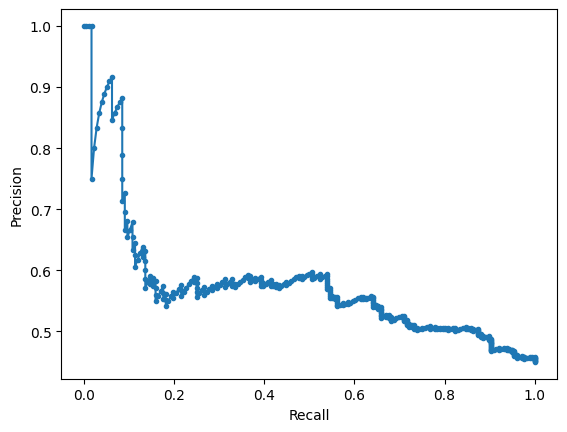

In [ ]:
scores1 = xgb_class1[0]
preds1 = xgb_class1[1]
actuals1 = xgb_class1[2]

# Report the overall F1 score
print("Average Accuracy score: {0}".format(np.average(scores1)))

prec1, recall1, _ = metrics.precision_recall_curve(actuals1, preds1)
print("AUPRC score: {0}".format(metrics.auc(recall1, prec1)))

# Generate the PR curve
plt.plot(recall1, prec1, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

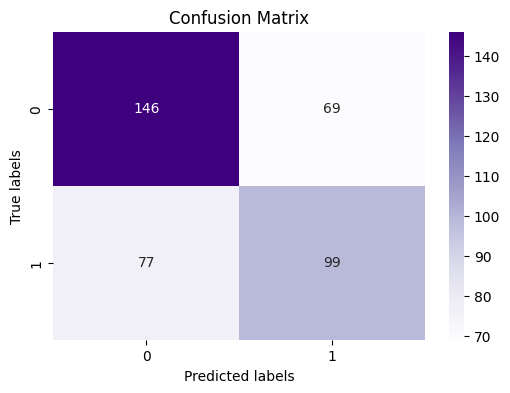

In [ ]:
# Convert probabilities to binary predictions
threshold = 0.5  # You can adjust the threshold if needed
binary_preds1 = [1 if pred >= threshold else 0 for pred in preds1]

# Generate confusion matrix
conf_matrix = confusion_matrix(actuals1, binary_preds1)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Model 2

In [ ]:
# hyperparameters for XGBoost and feature selector
param_grid2 = dict(
    FS__threshold = ["mean", "median"],
    classifier__n_estimators = [400, 500, 600],
    classifier__max_depth = [5, 7, 10],
    classifier__learning_rate = [0.05, 0.1, 0.5],
    classifier__min_child_weight = [0, 1],
    classifier__subsample = [0.8, 1],
    classifier__colsample_bytree = [0.8, 1],
    classifier__gamma = [0, 0.01],
    classifier__lambda = [0, 0.01],
    classifier__alpha = [0, 0.01])

xgb_class2 = XGBoost_ModelSelection(X, y, pipeline, param_grid2, k = 5)

Internal CV F1 of estimator: 0.6153312916591605
Number of selected features 111
Selected features ['ReferralCount', 'AgeAtReferralRequest', 'EthnicCode', 'EthnicCodeShort', 'Treated', 'TherapistID', 'ExperienceLevel', 'CareContacts', 'Item2', 'Item3', 'Item5', 'Item6', 'Item7', 'Item8', 'Item11', 'Item13', 'Item14', 'Item15', 'Item17', 'Item18', 'Item19', 'Item21', 'Item23', 'Item24', 'Item28', 'Item30', 'Item32', 'Item33', 'Item34', 'Item36', 'Item37', 'Item38', 'Item41', 'Item42', 'Item43', 'Item47', 'Item48', 'Item49', 'Item52', 'Item57', 'Item58', 'Item60', 'Item63', 'Item69', 'Item73', 'Item78', 'Item81', 'Item82', 'Item83', 'Item85', 'Item86', 'Item87', 'Item88', 'Item90', 'Item91', 'Item93', 'Item97', 'Item103', 'Item111', 'Item114', 'Item118', 'Item121', 'Item126', 'Item127', 'Item137', 'Item139', 'Item157', 'Item165', 'Item166', 'Item167', 'Item168', 'Item171', 'Item173', 'Item174', 'Item175', 'Item176', 'Item177', 'Item178', 'Item179', 'Item181', 'Item185', 'Item186', 'Item18

In [ ]:
scores2 = xgb_class2[0]
preds2 = xgb_class2[1]
actuals2 = xgb_class2[2]

# Report the overall F1 score
print("Average F1 score: {0}".format(np.average(scores2)))

prec2, recall2, _ = metrics.precision_recall_curve(actuals2, preds2)
print("AUPRC score: {0}".format(metrics.auc(recall2, prec2)))

# Generate the PR curve
plt.plot(recall2, prec2, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

NameError: name 'xgb_class2' is not defined

### Final Model

In [ ]:
# Initialize XGBoost classifier with best hyperparameters
best_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_child_weight': None,
    'subsample': 1.0,
    'colsample_bytree': 0.5,
    'gamma': None,
    'reg_lambda': None,
    'reg_alpha': None
}

xgb_classifier = XGBClassifier(**best_params)

# Feature selector
feature_selector = SelectFromModel(xgb_classifier)

# Create a pipeline
pipeline = Pipeline([
    ('FS', feature_selector),
    ('classifier', xgb_classifier)
])

# Train the model on the entire dataset
pipeline.fit(X, y)

Pipeline(steps=[('FS',
                 SelectFromModel(estimator=XGBClassifier(base_score=None,
                                                         booster=None,
                                                         callbacks=None,
                                                         colsample_bylevel=None,
                                                         colsample_bynode=None,
                                                         colsample_bytree=0.5,
                                                         device=None,
                                                         early_stopping_rounds=None,
                                                         enable_categorical=False,
                                                         eval_metric=None,
                                                         feature_types=None,
                                                         gamma=None,
                                                         grow_policy=None,
                                                         importance_type=None,
                                                         interaction_constraints=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# # create new row
# new_row = pd.Series([np.nan] * len(df.columns), index=df.columns)
# new_df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

# # Adding new values to the last row
# new_df.loc[new_df.index[-1], 'ReferralCount'] = 1
# new_df.loc[new_df.index[-1], 'EthnicCode'] = 1
# new_df.loc[new_df.index[-1], 'EthnicCodeShort'] = 1
# new_df.loc[new_df.index[-1], 'Gender'] = 1

# new_df.iloc[-2:, :]

# # Use the trained pipeline to make predictions on the new data
# predictions = pipeline.predict(new_data_df)

# # Print the predictions
# print(predictions)

,ReferralCount,AgeAtReferralRequest,EthnicCode,EthnicCodeShort,Gender,EndDesc_Mutually agreed completion of treatment,EndDesc_Not suitable for IAPT service - no action taken or directed back to referrer,EndDesc_Termition of treatment earlier than Care Professiol planned,Treated,TherapistID,...,Item204,Item208,Item209,Item211,Item212,Item213,Item214,Item219,Item221,Item224
727,1.0,0.0,3.0,2.0,2.0,0,0,0,1.0,12.305036,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,NaN,1.0,1.0,1.0,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. Select a random row from the DataFrame
random_row = df.sample(n=1, random_state=2001)

# 2. Prepare the features (X) for prediction
X_pred = random_row.drop(columns=['Recovery'])  # Remove the target column if it exists

# 3. Apply feature selection to the prediction data
X_pred_selected = feature_selector.transform(X_pred)

# 4. Get the feature names selected by the feature selector
selected_features = X.columns[feature_selector.get_support()]

# 5. Ensure that the feature names in the prediction data match the selected feature names
X_pred_selected = pd.DataFrame(X_pred_selected, columns=selected_features)

# 6. Use the pipeline to make predictions
prediction = pipeline.predict(X_pred_selected)

print("Predicted class:", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- EndDesc_Mutually agreed completion of treatment
- EndDesc_Not suitable for IAPT service - no action taken or directed back to referrer
- EndDesc_Termition of treatment earlier than Care Professiol planned
- ReliableChangeDesc
- ReliableRecovery
